### 0. 사용할 패키지 불러오기

In [1]:
import numpy as np

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

width = 28
height = 28

Using TensorFlow backend.


### 1. 데이터셋 생성하기

In [2]:
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### 2. 모델 구성하기

In [3]:
model =Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기

In [5]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data = (x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 9s 174us/step - loss: 0.6673 - acc: 0.8269 - val_loss: 0.2953 - val_acc: 0.9166
Epoch 2/30
50000/50000 [==============================] - 5s 108us/step - loss: 0.2842 - acc: 0.9185 - val_loss: 0.2552 - val_acc: 0.9239
Epoch 3/30
50000/50000 [==============================] - 5s 105us/step - loss: 0.2257 - acc: 0.9342 - val_loss: 0.1931 - val_acc: 0.9482
Epoch 4/30
50000/50000 [==============================] - 5s 107us/step - loss: 0.1880 - acc: 0.9453 - val_loss: 0.1710 - val_acc: 0.9518
Epoch 5/30
50000/50000 [==============================] - 5s 107us/step - loss: 0.1603 - acc: 0.9533 - val_loss: 0.1549 - val_acc: 0.9561
Epoch 6/30
50000/50000 [==============================] - 5s 107us/step - loss: 0.1385 - acc: 0.9593 - val_loss: 0.1336 - val_acc: 0.9629
Epoch 7/30
50000/50000 [==============================] - 6s 111us/step - loss: 0.1215 - acc: 0.9645 - val_loss: 0.1228 - 

### 5. 학습과정 살펴보기

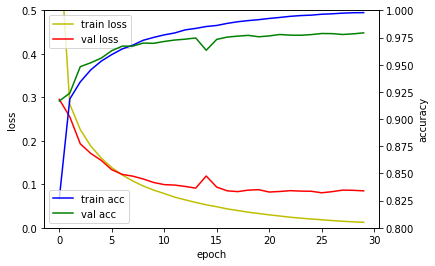

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [7]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 32us/step
## evaluation loss and metrics ##
[0.07389547076027375, 0.9783]


### 7. 모델 사용하기

In [8]:
yhat_test = model.predict(x_test, batch_size=32)

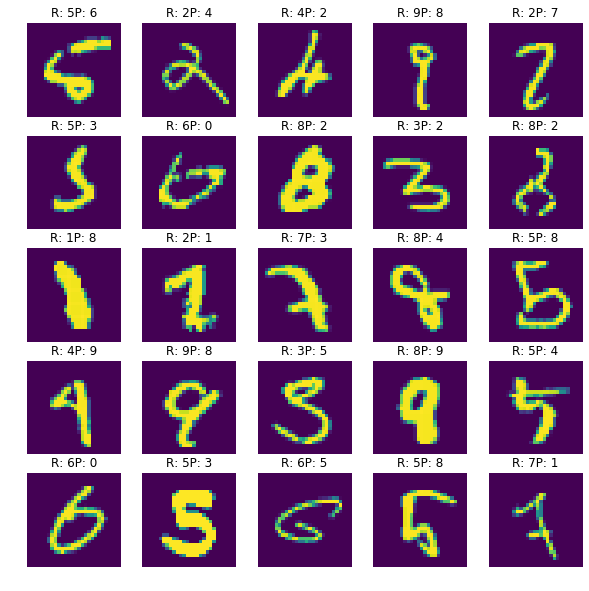

In [11]:
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
        
    sub_plt = axarr[int(cnt/plt_row), int(cnt%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + 'P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    
    i += 1
    cnt += 1

plt.show()